# Initial-value problems

In [1]:
restoredefaultpath
set(0,'defaultlinelinewidth',1)
set(0,'defaultaxesfontsize',6)

In [2]:
%plot -s 800,400 -r 160 -f png

A consistent theme so far about first-order ODEs is that solutions are not unique. There is a general solution that describes a family of functions that provide all possible solutions. The manifestation of the nonuniqueness is an integration constant.

In scientific and engineering problems we typically have an additional constraint that picks out a single member of the solution family, i.e., a particular solution. Usually that constraint takes the form of a specified value,

$$
x(t_0) = x_0,
$$

where $t_0$ and $x_0$ are known or used as parameters. Such a constraint combined with a first-order ODE leads to an {term}`initial-value problem`, or IVP for short:

````{proof:definition} Initial-value problem
```{math}
\dd{x}{t} = f(t,x), \quad x(t_0) = x_0.
```
````

In this case the constraint $x(t_0)=x_0$ is called an {term}`initial condition`, and it's typically implied that the problem is to be solved for $t>t_0$.

A solution of an IVP has to satisfy both the ODE and the initial condition. This is enough to specify the solution uniquely.

::::{admonition} Example
:class: tip
In the previous section we said that the general solution of $x'=ax$ is $x(t)=Ce^{at}$. If we are supplied with the initial value $x(2)=5$, then we require

$$
5 = x(2) = Ce^{2a},
$$

in which case $C=5e^{-2a}$. Thus the solution to this IVP is

$$
x(t) = 5e^{-2a}\cdot e^{at} = 5e^{a(t-2)}.
$$
::::

A graphical interpretation of the role of an initial condition is that the general solution is a family of curves in the $(t,x)$ plane, and the initial condition is a point that the particular solution of interest must pass through.

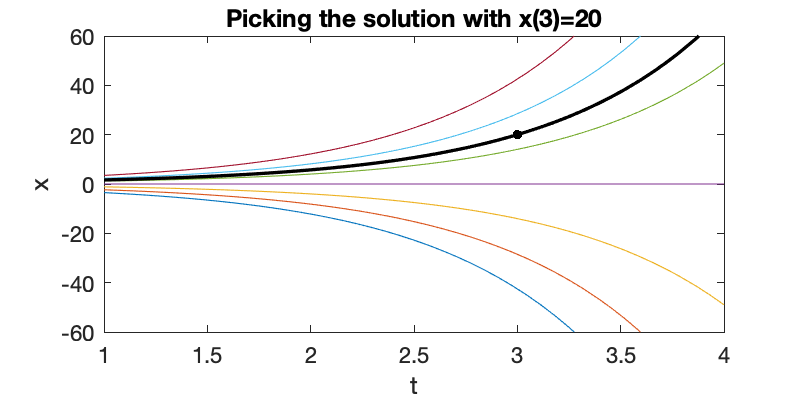

In [3]:
a = 1.25;
for C = [-1 -0.67 -0.33 0 0.33 0.67 1]
    fplot(@(t) C*exp(a*t),[1,4])
    hold on
end

plot(3,20,'k.','markersize',11)
fplot(@(t) 20*exp(a*(t-3)),[1,4],'k','linew',1.5)
ylim([-60 60])
xlabel('t'), ylabel('x')
title('Picking the solution with x(3)=20')

## Numerical solutions

Because an initial-value problem has a unique solution, it's a suitable target for a numerical simulation. We will use the function `ode45` to provide such numerics in MATLAB. For example, here is constant growth subject to the initial condition $x(1)=3$.

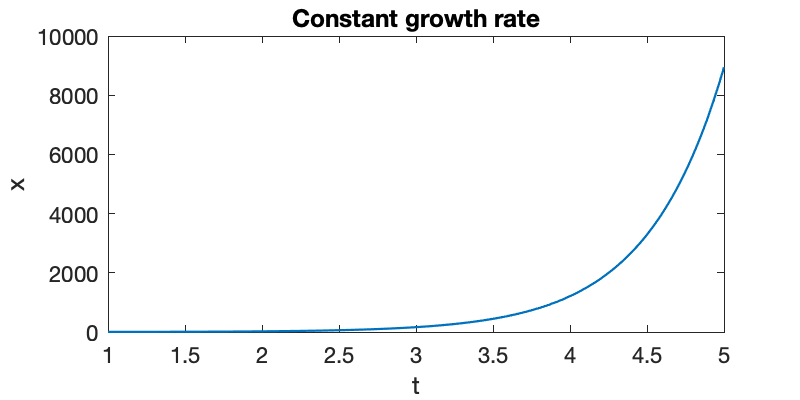

In [4]:
f = @(t,x) 2*x;
t = linspace(1,5,300);
[t,x] = ode45(f,t,3);
clf
plot(t,x)
title('Constant growth rate')
xlabel('t'), ylabel('x')

Exponential growth or decay is best plotted on a log-linear scale, where the solution becomes a straight line.

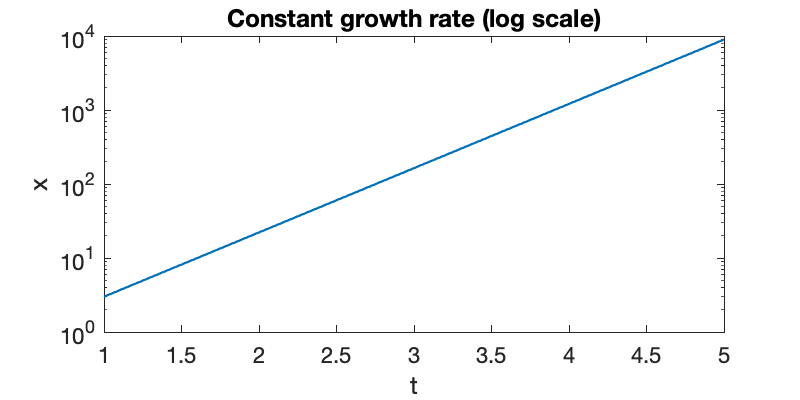

In [5]:
semilogy(t,x)
title('Constant growth rate (log scale)')
xlabel('t'), ylabel('x')

Here's our example of variable growth. Note that we are not using the known exact solution, but just letting MATLAB create a numerical approximation by other means.

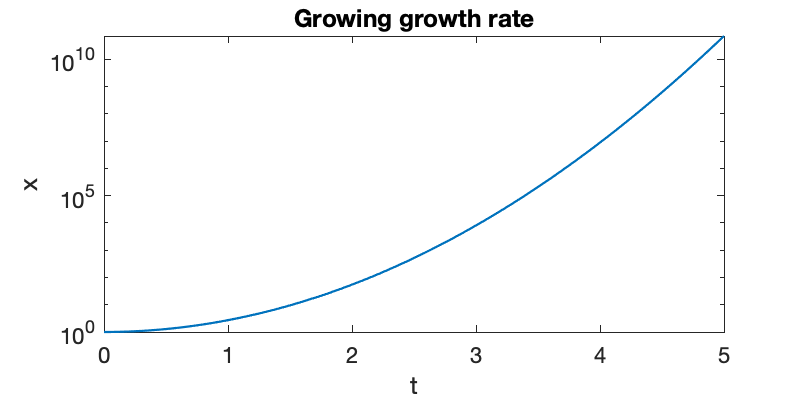

In [6]:
f = @(t,x) 2*t*x;
t = linspace(0,5,300);
[t,x] = ode45(f,t,1);
clf
semilogy(t,x)
title('Growing growth rate')
xlabel('t'), ylabel('x')

Even on the log scale, the solution bends upward, showing superexponential growth. Finally, here is the nonlinear feedback problem.

> In ode45 (line 360)


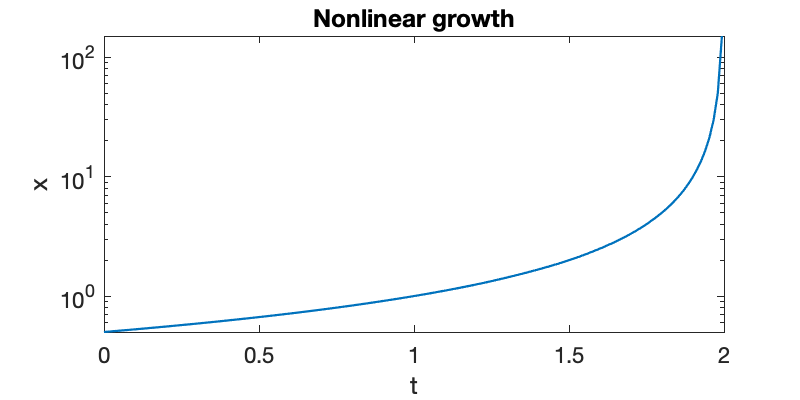

In [7]:
f = @(t,x) x^2;
t = linspace(0,4,300);
[t,x] = ode45(f,t,0.5);
semilogy(t,x)
title('Nonlinear growth')
xlabel('t'), ylabel('x')

The warning issued here can mean that there is a bug in the code, but in this case, it's just MATLAB noticing the finite-time blowup. In fact, it gets the true blowup time rather accurately.

<div style="max-width:608px"><div style="position:relative;padding-bottom:66.118421052632%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_q1aq8k0w&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_clcqkkfz" width="608" height="402" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>